In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import log_loss
from sklearn.metrics import average_precision_score as aps
from sklearn.metrics import roc_auc_score as auc

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
feature_list = list(df.columns)
feature_list.remove('ID_code')
feature_list.remove('target')

X = df[feature_list].values
y = df['target'].values

In [7]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.3)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.2)

In [8]:
import lightgbm as lgb

In [9]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

lgbm_params = {
    'objective': 'binary',
    'is_unbalance': True,
    'num_leaves': 24,
}

# 上記のパラメータでモデルを学習する
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_val, num_boost_round=2800)

[1]	valid_0's binary_logloss: 0.32411
[2]	valid_0's binary_logloss: 0.336165
[3]	valid_0's binary_logloss: 0.350828
[4]	valid_0's binary_logloss: 0.365796
[5]	valid_0's binary_logloss: 0.380846
[6]	valid_0's binary_logloss: 0.396162
[7]	valid_0's binary_logloss: 0.410403
[8]	valid_0's binary_logloss: 0.423626
[9]	valid_0's binary_logloss: 0.436316
[10]	valid_0's binary_logloss: 0.447331
[11]	valid_0's binary_logloss: 0.457821
[12]	valid_0's binary_logloss: 0.467013
[13]	valid_0's binary_logloss: 0.47541
[14]	valid_0's binary_logloss: 0.482591
[15]	valid_0's binary_logloss: 0.489373
[16]	valid_0's binary_logloss: 0.494945
[17]	valid_0's binary_logloss: 0.500421
[18]	valid_0's binary_logloss: 0.505101
[19]	valid_0's binary_logloss: 0.509321
[20]	valid_0's binary_logloss: 0.512949
[21]	valid_0's binary_logloss: 0.516123
[22]	valid_0's binary_logloss: 0.518652
[23]	valid_0's binary_logloss: 0.520333
[24]	valid_0's binary_logloss: 0.521679
[25]	valid_0's binary_logloss: 0.52264
[26]	valid_0

[207]	valid_0's binary_logloss: 0.37083
[208]	valid_0's binary_logloss: 0.370385
[209]	valid_0's binary_logloss: 0.369903
[210]	valid_0's binary_logloss: 0.369479
[211]	valid_0's binary_logloss: 0.369058
[212]	valid_0's binary_logloss: 0.368623
[213]	valid_0's binary_logloss: 0.368219
[214]	valid_0's binary_logloss: 0.367824
[215]	valid_0's binary_logloss: 0.367395
[216]	valid_0's binary_logloss: 0.366956
[217]	valid_0's binary_logloss: 0.366638
[218]	valid_0's binary_logloss: 0.366158
[219]	valid_0's binary_logloss: 0.36578
[220]	valid_0's binary_logloss: 0.365418
[221]	valid_0's binary_logloss: 0.364948
[222]	valid_0's binary_logloss: 0.364546
[223]	valid_0's binary_logloss: 0.364042
[224]	valid_0's binary_logloss: 0.363587
[225]	valid_0's binary_logloss: 0.363182
[226]	valid_0's binary_logloss: 0.362822
[227]	valid_0's binary_logloss: 0.36246
[228]	valid_0's binary_logloss: 0.362045
[229]	valid_0's binary_logloss: 0.361588
[230]	valid_0's binary_logloss: 0.36112
[231]	valid_0's bina

[412]	valid_0's binary_logloss: 0.313798
[413]	valid_0's binary_logloss: 0.313624
[414]	valid_0's binary_logloss: 0.313468
[415]	valid_0's binary_logloss: 0.313301
[416]	valid_0's binary_logloss: 0.313184
[417]	valid_0's binary_logloss: 0.312986
[418]	valid_0's binary_logloss: 0.312843
[419]	valid_0's binary_logloss: 0.312683
[420]	valid_0's binary_logloss: 0.312476
[421]	valid_0's binary_logloss: 0.312386
[422]	valid_0's binary_logloss: 0.312142
[423]	valid_0's binary_logloss: 0.31188
[424]	valid_0's binary_logloss: 0.311663
[425]	valid_0's binary_logloss: 0.311542
[426]	valid_0's binary_logloss: 0.311366
[427]	valid_0's binary_logloss: 0.311163
[428]	valid_0's binary_logloss: 0.311005
[429]	valid_0's binary_logloss: 0.310811
[430]	valid_0's binary_logloss: 0.310724
[431]	valid_0's binary_logloss: 0.3105
[432]	valid_0's binary_logloss: 0.310328
[433]	valid_0's binary_logloss: 0.310167
[434]	valid_0's binary_logloss: 0.309962
[435]	valid_0's binary_logloss: 0.30982
[436]	valid_0's bina

[618]	valid_0's binary_logloss: 0.286944
[619]	valid_0's binary_logloss: 0.286871
[620]	valid_0's binary_logloss: 0.286713
[621]	valid_0's binary_logloss: 0.286624
[622]	valid_0's binary_logloss: 0.286494
[623]	valid_0's binary_logloss: 0.286418
[624]	valid_0's binary_logloss: 0.286354
[625]	valid_0's binary_logloss: 0.28624
[626]	valid_0's binary_logloss: 0.286139
[627]	valid_0's binary_logloss: 0.286034
[628]	valid_0's binary_logloss: 0.285912
[629]	valid_0's binary_logloss: 0.285782
[630]	valid_0's binary_logloss: 0.28569
[631]	valid_0's binary_logloss: 0.285567
[632]	valid_0's binary_logloss: 0.285371
[633]	valid_0's binary_logloss: 0.285248
[634]	valid_0's binary_logloss: 0.285129
[635]	valid_0's binary_logloss: 0.284985
[636]	valid_0's binary_logloss: 0.284853
[637]	valid_0's binary_logloss: 0.28476
[638]	valid_0's binary_logloss: 0.284657
[639]	valid_0's binary_logloss: 0.28454
[640]	valid_0's binary_logloss: 0.284462
[641]	valid_0's binary_logloss: 0.284333
[642]	valid_0's bina

[822]	valid_0's binary_logloss: 0.268367
[823]	valid_0's binary_logloss: 0.268294
[824]	valid_0's binary_logloss: 0.268256
[825]	valid_0's binary_logloss: 0.268198
[826]	valid_0's binary_logloss: 0.268086
[827]	valid_0's binary_logloss: 0.267995
[828]	valid_0's binary_logloss: 0.267888
[829]	valid_0's binary_logloss: 0.267816
[830]	valid_0's binary_logloss: 0.267721
[831]	valid_0's binary_logloss: 0.267695
[832]	valid_0's binary_logloss: 0.267607
[833]	valid_0's binary_logloss: 0.26746
[834]	valid_0's binary_logloss: 0.267406
[835]	valid_0's binary_logloss: 0.267324
[836]	valid_0's binary_logloss: 0.267189
[837]	valid_0's binary_logloss: 0.267093
[838]	valid_0's binary_logloss: 0.267058
[839]	valid_0's binary_logloss: 0.266994
[840]	valid_0's binary_logloss: 0.266939
[841]	valid_0's binary_logloss: 0.266884
[842]	valid_0's binary_logloss: 0.266846
[843]	valid_0's binary_logloss: 0.266809
[844]	valid_0's binary_logloss: 0.266741
[845]	valid_0's binary_logloss: 0.266652
[846]	valid_0's b

[1022]	valid_0's binary_logloss: 0.254789
[1023]	valid_0's binary_logloss: 0.254689
[1024]	valid_0's binary_logloss: 0.254629
[1025]	valid_0's binary_logloss: 0.254588
[1026]	valid_0's binary_logloss: 0.254528
[1027]	valid_0's binary_logloss: 0.254463
[1028]	valid_0's binary_logloss: 0.254418
[1029]	valid_0's binary_logloss: 0.254328
[1030]	valid_0's binary_logloss: 0.254248
[1031]	valid_0's binary_logloss: 0.254181
[1032]	valid_0's binary_logloss: 0.254132
[1033]	valid_0's binary_logloss: 0.254066
[1034]	valid_0's binary_logloss: 0.253968
[1035]	valid_0's binary_logloss: 0.253932
[1036]	valid_0's binary_logloss: 0.253843
[1037]	valid_0's binary_logloss: 0.253808
[1038]	valid_0's binary_logloss: 0.253769
[1039]	valid_0's binary_logloss: 0.253687
[1040]	valid_0's binary_logloss: 0.253678
[1041]	valid_0's binary_logloss: 0.253675
[1042]	valid_0's binary_logloss: 0.253613
[1043]	valid_0's binary_logloss: 0.253558
[1044]	valid_0's binary_logloss: 0.253477
[1045]	valid_0's binary_logloss: 0

[1221]	valid_0's binary_logloss: 0.244037
[1222]	valid_0's binary_logloss: 0.243984
[1223]	valid_0's binary_logloss: 0.243967
[1224]	valid_0's binary_logloss: 0.243937
[1225]	valid_0's binary_logloss: 0.243893
[1226]	valid_0's binary_logloss: 0.243829
[1227]	valid_0's binary_logloss: 0.243799
[1228]	valid_0's binary_logloss: 0.243779
[1229]	valid_0's binary_logloss: 0.243666
[1230]	valid_0's binary_logloss: 0.243619
[1231]	valid_0's binary_logloss: 0.243586
[1232]	valid_0's binary_logloss: 0.243545
[1233]	valid_0's binary_logloss: 0.243475
[1234]	valid_0's binary_logloss: 0.243435
[1235]	valid_0's binary_logloss: 0.243372
[1236]	valid_0's binary_logloss: 0.243347
[1237]	valid_0's binary_logloss: 0.243306
[1238]	valid_0's binary_logloss: 0.243245
[1239]	valid_0's binary_logloss: 0.243202
[1240]	valid_0's binary_logloss: 0.243176
[1241]	valid_0's binary_logloss: 0.243146
[1242]	valid_0's binary_logloss: 0.243094
[1243]	valid_0's binary_logloss: 0.243013
[1244]	valid_0's binary_logloss: 0

[1421]	valid_0's binary_logloss: 0.235508
[1422]	valid_0's binary_logloss: 0.235473
[1423]	valid_0's binary_logloss: 0.235467
[1424]	valid_0's binary_logloss: 0.235417
[1425]	valid_0's binary_logloss: 0.235392
[1426]	valid_0's binary_logloss: 0.235328
[1427]	valid_0's binary_logloss: 0.235301
[1428]	valid_0's binary_logloss: 0.235259
[1429]	valid_0's binary_logloss: 0.235186
[1430]	valid_0's binary_logloss: 0.235184
[1431]	valid_0's binary_logloss: 0.235141
[1432]	valid_0's binary_logloss: 0.235113
[1433]	valid_0's binary_logloss: 0.235081
[1434]	valid_0's binary_logloss: 0.23507
[1435]	valid_0's binary_logloss: 0.235039
[1436]	valid_0's binary_logloss: 0.234971
[1437]	valid_0's binary_logloss: 0.23493
[1438]	valid_0's binary_logloss: 0.234929
[1439]	valid_0's binary_logloss: 0.234907
[1440]	valid_0's binary_logloss: 0.234882
[1441]	valid_0's binary_logloss: 0.234829
[1442]	valid_0's binary_logloss: 0.234802
[1443]	valid_0's binary_logloss: 0.234703
[1444]	valid_0's binary_logloss: 0.2

[1621]	valid_0's binary_logloss: 0.229364
[1622]	valid_0's binary_logloss: 0.229342
[1623]	valid_0's binary_logloss: 0.229301
[1624]	valid_0's binary_logloss: 0.229272
[1625]	valid_0's binary_logloss: 0.22925
[1626]	valid_0's binary_logloss: 0.229237
[1627]	valid_0's binary_logloss: 0.229183
[1628]	valid_0's binary_logloss: 0.229157
[1629]	valid_0's binary_logloss: 0.22914
[1630]	valid_0's binary_logloss: 0.229114
[1631]	valid_0's binary_logloss: 0.229069
[1632]	valid_0's binary_logloss: 0.229064
[1633]	valid_0's binary_logloss: 0.229066
[1634]	valid_0's binary_logloss: 0.229052
[1635]	valid_0's binary_logloss: 0.229042
[1636]	valid_0's binary_logloss: 0.228997
[1637]	valid_0's binary_logloss: 0.229002
[1638]	valid_0's binary_logloss: 0.22898
[1639]	valid_0's binary_logloss: 0.228912
[1640]	valid_0's binary_logloss: 0.228867
[1641]	valid_0's binary_logloss: 0.228808
[1642]	valid_0's binary_logloss: 0.228811
[1643]	valid_0's binary_logloss: 0.228788
[1644]	valid_0's binary_logloss: 0.22

[1818]	valid_0's binary_logloss: 0.225349
[1819]	valid_0's binary_logloss: 0.225368
[1820]	valid_0's binary_logloss: 0.225337
[1821]	valid_0's binary_logloss: 0.225295
[1822]	valid_0's binary_logloss: 0.225285
[1823]	valid_0's binary_logloss: 0.22525
[1824]	valid_0's binary_logloss: 0.225235
[1825]	valid_0's binary_logloss: 0.225213
[1826]	valid_0's binary_logloss: 0.225203
[1827]	valid_0's binary_logloss: 0.225171
[1828]	valid_0's binary_logloss: 0.225142
[1829]	valid_0's binary_logloss: 0.225104
[1830]	valid_0's binary_logloss: 0.225094
[1831]	valid_0's binary_logloss: 0.225077
[1832]	valid_0's binary_logloss: 0.225057
[1833]	valid_0's binary_logloss: 0.225028
[1834]	valid_0's binary_logloss: 0.225027
[1835]	valid_0's binary_logloss: 0.225014
[1836]	valid_0's binary_logloss: 0.225006
[1837]	valid_0's binary_logloss: 0.225003
[1838]	valid_0's binary_logloss: 0.224982
[1839]	valid_0's binary_logloss: 0.224956
[1840]	valid_0's binary_logloss: 0.224934
[1841]	valid_0's binary_logloss: 0.

[2017]	valid_0's binary_logloss: 0.2229
[2018]	valid_0's binary_logloss: 0.222911
[2019]	valid_0's binary_logloss: 0.222891
[2020]	valid_0's binary_logloss: 0.222906
[2021]	valid_0's binary_logloss: 0.222911
[2022]	valid_0's binary_logloss: 0.22289
[2023]	valid_0's binary_logloss: 0.222907
[2024]	valid_0's binary_logloss: 0.222898
[2025]	valid_0's binary_logloss: 0.222879
[2026]	valid_0's binary_logloss: 0.22287
[2027]	valid_0's binary_logloss: 0.222848
[2028]	valid_0's binary_logloss: 0.222805
[2029]	valid_0's binary_logloss: 0.222766
[2030]	valid_0's binary_logloss: 0.222765
[2031]	valid_0's binary_logloss: 0.222798
[2032]	valid_0's binary_logloss: 0.222789
[2033]	valid_0's binary_logloss: 0.22278
[2034]	valid_0's binary_logloss: 0.222799
[2035]	valid_0's binary_logloss: 0.222753
[2036]	valid_0's binary_logloss: 0.222705
[2037]	valid_0's binary_logloss: 0.222711
[2038]	valid_0's binary_logloss: 0.222699
[2039]	valid_0's binary_logloss: 0.222657
[2040]	valid_0's binary_logloss: 0.2226

[2213]	valid_0's binary_logloss: 0.221279
[2214]	valid_0's binary_logloss: 0.221284
[2215]	valid_0's binary_logloss: 0.221303
[2216]	valid_0's binary_logloss: 0.2213
[2217]	valid_0's binary_logloss: 0.221266
[2218]	valid_0's binary_logloss: 0.221255
[2219]	valid_0's binary_logloss: 0.221248
[2220]	valid_0's binary_logloss: 0.221214
[2221]	valid_0's binary_logloss: 0.221186
[2222]	valid_0's binary_logloss: 0.221206
[2223]	valid_0's binary_logloss: 0.221209
[2224]	valid_0's binary_logloss: 0.221184
[2225]	valid_0's binary_logloss: 0.221163
[2226]	valid_0's binary_logloss: 0.221184
[2227]	valid_0's binary_logloss: 0.221184
[2228]	valid_0's binary_logloss: 0.221177
[2229]	valid_0's binary_logloss: 0.221201
[2230]	valid_0's binary_logloss: 0.221251
[2231]	valid_0's binary_logloss: 0.221263
[2232]	valid_0's binary_logloss: 0.221253
[2233]	valid_0's binary_logloss: 0.221238
[2234]	valid_0's binary_logloss: 0.221234
[2235]	valid_0's binary_logloss: 0.221217
[2236]	valid_0's binary_logloss: 0.2

[2409]	valid_0's binary_logloss: 0.22119
[2410]	valid_0's binary_logloss: 0.22119
[2411]	valid_0's binary_logloss: 0.221205
[2412]	valid_0's binary_logloss: 0.221168
[2413]	valid_0's binary_logloss: 0.221161
[2414]	valid_0's binary_logloss: 0.221214
[2415]	valid_0's binary_logloss: 0.221246
[2416]	valid_0's binary_logloss: 0.221253
[2417]	valid_0's binary_logloss: 0.221266
[2418]	valid_0's binary_logloss: 0.221275
[2419]	valid_0's binary_logloss: 0.221301
[2420]	valid_0's binary_logloss: 0.221303
[2421]	valid_0's binary_logloss: 0.221336
[2422]	valid_0's binary_logloss: 0.22132
[2423]	valid_0's binary_logloss: 0.221331
[2424]	valid_0's binary_logloss: 0.221341
[2425]	valid_0's binary_logloss: 0.221369
[2426]	valid_0's binary_logloss: 0.221371
[2427]	valid_0's binary_logloss: 0.221357
[2428]	valid_0's binary_logloss: 0.221339
[2429]	valid_0's binary_logloss: 0.221334
[2430]	valid_0's binary_logloss: 0.221298
[2431]	valid_0's binary_logloss: 0.221307
[2432]	valid_0's binary_logloss: 0.22

[2605]	valid_0's binary_logloss: 0.222162
[2606]	valid_0's binary_logloss: 0.222147
[2607]	valid_0's binary_logloss: 0.222147
[2608]	valid_0's binary_logloss: 0.222153
[2609]	valid_0's binary_logloss: 0.222187
[2610]	valid_0's binary_logloss: 0.222168
[2611]	valid_0's binary_logloss: 0.222159
[2612]	valid_0's binary_logloss: 0.222146
[2613]	valid_0's binary_logloss: 0.222164
[2614]	valid_0's binary_logloss: 0.22216
[2615]	valid_0's binary_logloss: 0.222151
[2616]	valid_0's binary_logloss: 0.22215
[2617]	valid_0's binary_logloss: 0.22218
[2618]	valid_0's binary_logloss: 0.222186
[2619]	valid_0's binary_logloss: 0.222194
[2620]	valid_0's binary_logloss: 0.222212
[2621]	valid_0's binary_logloss: 0.222228
[2622]	valid_0's binary_logloss: 0.222203
[2623]	valid_0's binary_logloss: 0.222214
[2624]	valid_0's binary_logloss: 0.222219
[2625]	valid_0's binary_logloss: 0.222218
[2626]	valid_0's binary_logloss: 0.222206
[2627]	valid_0's binary_logloss: 0.222198
[2628]	valid_0's binary_logloss: 0.22

In [10]:
ctr_train = np.array(y_train).mean()

In [11]:
# テストデータを予測する
def evals(X, y_true, ctr_train):
    y_pred = model.predict(X)
    y_pred_post = y_pred / (y_pred  +  (1 - ctr_train) / ctr_train  * (1 - y_pred) )
    print('logloss: %.4f' % log_loss(y_true, y_pred))
    print('logloss_post: %.4f' % log_loss(y_true, y_pred_post))
    print('auc: %.4f' % auc(y_true, y_pred))
    print('norm aps:  %.4f' % (aps(y_true, y_pred)/y_true.mean()))

In [12]:
print('-'*10)
evals(X_train, y_train, ctr_train)
print('-'*10)
evals(X_val, y_val, ctr_train)
print('-'*10)
evals(X_test, y_test, ctr_train)

----------
logloss: 0.0195
logloss_post: 0.0177
auc: 1.0000
norm aps:  9.8992
----------
logloss: 0.2235
logloss_post: 0.3170
auc: 0.8794
norm aps:  5.5485
----------
logloss: 0.2267
logloss_post: 0.3233
auc: 0.8784
norm aps:  5.4679


In [13]:
def gen_plot_points(X, y_true, num_points=100):
    y_pred = model.predict(X) 
    scores = []
    ctrs = []
    delta = 1 / num_points
    for i in range(num_points):
        mask = (y_pred >= delta * i) * (y_pred < delta * (i +1))
        if mask.sum() > 0:
            scores.append(y_pred[mask].mean())
            ctrs.append(y_true[mask].mean())
    return scores, ctrs

In [14]:
scores_train, ctrs_train  =  gen_plot_points(X_train, y_train)
scores_val, ctrs_val  =  gen_plot_points(X_val, y_val)
scores_test, ctrs_test  =  gen_plot_points(X_test, y_test)

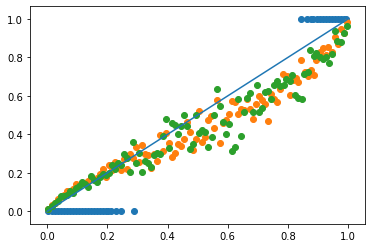

In [15]:
plt.scatter(scores_train, ctrs_train)
plt.scatter(scores_test, ctrs_test)
plt.scatter(scores_val, ctrs_val )

plt.plot([0,1], [0,1])
plt.show()

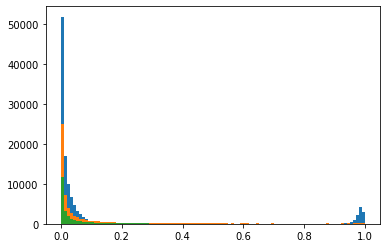

In [16]:
plt.hist(model.predict(X_train) , bins=100)
plt.hist(model.predict(X_test) , bins=100)
plt.hist(model.predict(X_val) , bins=100)
plt.show()

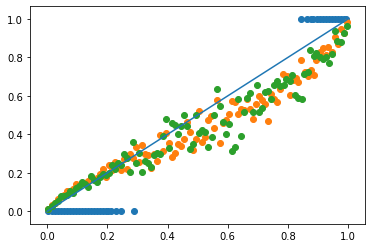

In [17]:
plt.scatter(scores_train, ctrs_train)
plt.scatter(scores_test, ctrs_test)
plt.scatter(scores_val, ctrs_val )

plt.plot([0,1], [0,1])
plt.show()

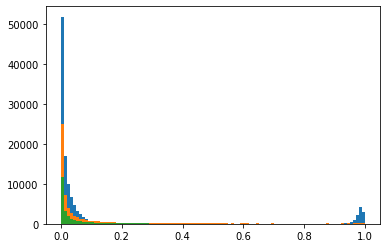

In [18]:
plt.hist(model.predict(X_train) , bins=100)
plt.hist(model.predict(X_test) , bins=100)
plt.hist(model.predict(X_val) , bins=100)
plt.show()

In [19]:
def post(scores, ctr_train):
    s_prev = np.array(scores)
    return s_prev / (s_prev  +  (1 - ctr_train) / ctr_train  * (1 - s_prev) )

In [20]:
s_post_train = post(scores_train, ctr_train)
s_post_val = post(scores_val, ctr_train)
s_post_test = post(scores_test, ctr_train)

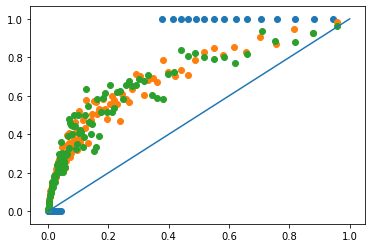

In [21]:
plt.scatter(s_post_train, ctrs_train)
plt.scatter(s_post_test, ctrs_test)
plt.scatter(s_post_val, ctrs_val )

plt.plot([0,1], [0,1])
plt.show()